* Basics of LangGraph
* This notebook demonstrates Non-AI agents (i.e:- just using and knowing the syntax of langgraph)

In [3]:
from langgraph.graph import StateGraph, START, END
from typing import Dict, List, TypedDict

We are defining our state schema.
Generally it is named as **AgentState**.

In [4]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    op: str
    sum: int
    sub: int

In [5]:
def greeting_node(state: AgentState) -> AgentState:
    '''Greeting node which says hi to the person.'''

    state['name'] = f'Hello, {state["name"]}'

    return state

In [6]:
def addition_node(state: AgentState) -> AgentState:
    '''Addition node which performs addition of two numbers'''

    state['sum'] = sum(state['number'])

    return state

In [7]:
def subtraction_node(state: AgentState) -> AgentState:
    '''Addition node which performs addition of two numbers'''

    state['sub'] = -sum(state['number'])

    return state

In [8]:
def op_determine_node(state: AgentState) -> AgentState:
    '''Determines the operation to be performed based on AgentState"s "op" value'''
    return 'add' if state['op'] == '+' else 'sub'

In [10]:
graph = StateGraph(AgentState)

graph.add_node('greeting', greeting_node)
graph.add_node('addition', addition_node)
graph.add_node('subtraction', subtraction_node)

# can use any one of the following
# graph.add_edge(START, 'greeting')
graph.set_entry_point('greeting')

graph.add_conditional_edges(
    'greeting',
    op_determine_node,
    {
        'add': 'addition',
        'sub': 'subtraction'
    }
)

graph.set_finish_point('addition')
graph.set_finish_point('subtraction')


In [13]:
app = graph.compile()

app.invoke({'name': 'steve', 'number': [1, 2, 3, 4, 5], 'op': '+'})

{'name': 'Hello, steve', 'number': [1, 2, 3, 4, 5], 'op': '+', 'sum': 15}

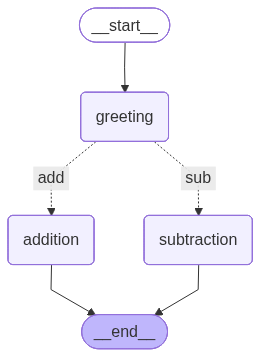

In [14]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))